In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [451]:
udemy_courses = pd.read_csv('udemy_courses.csv')
udemy_courses.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


## Exploring the data 

#### data type

In [9]:
udemy_courses.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

#### looking for more information on the data

In [10]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


#### looking for the shape of the table, thus number of rows and colums

In [8]:
udemy_courses.shape

(3678, 12)

#### getting more information information about the data

In [452]:
udemy_courses.describe(include='all')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
count,3.678000e+03,3678,3678,3678,3678.000000,3678.000000,3678.000000,3678.000000,3678,3678.000000,3678,3678
unique,NaN,3663,3672,2,NaN,NaN,NaN,NaN,4,NaN,3672,4
top,NaN,Acoustic Blues Guitar Lessons,https://www.udemy.com/understanding-financial-...,True,NaN,NaN,NaN,NaN,All Levels,NaN,2016-12-15T14:56:17Z,Web Development
freq,NaN,3,2,3368,NaN,NaN,NaN,NaN,1929,NaN,2,1200
mean,6.759720e+05,NaN,NaN,NaN,66.049483,3197.150625,156.259108,40.108755,NaN,4.094517,NaN,NaN
std,3.432732e+05,NaN,NaN,NaN,61.005755,9504.117010,935.452044,50.383346,NaN,6.053840,NaN,NaN
min,8.324000e+03,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,4.076925e+05,NaN,NaN,NaN,20.000000,111.000000,4.000000,15.000000,NaN,1.000000,NaN,NaN
50%,6.879170e+05,NaN,NaN,NaN,45.000000,911.500000,18.000000,25.000000,NaN,2.000000,NaN,NaN
75%,9.613555e+05,NaN,NaN,NaN,95.000000,2546.000000,67.000000,45.750000,NaN,4.500000,NaN,NaN


#### looking for duplicates in course_id

In [182]:
udemy_courses['course_id']. value_counts()

185526     2
1084454    2
837322     2
28295      2
1035638    2
          ..
294408     1
577256     1
783748     1
128384     1
933888     1
Name: course_id, Length: 3672, dtype: int64

#### dropping any duplicate

In [214]:
udemycourses = udemy_courses.drop_duplicates(subset = ['course_id')
udemycourses['course_id'].value_counts()

1227322    1
1034414    1
335902     1
615106     1
419318     1
          ..
1271182    1
375136     1
660876     1
294408     1
933888     1
Name: course_id, Length: 3672, dtype: int64

In [215]:
udemycourses['course_id'].isna().value_counts()

False    3672
Name: course_id, dtype: int64

In [207]:
udemycourses['is_paid'].isna().value_counts()

False    3672
Name: is_paid, dtype: int64

In [210]:
udemycourses['price'].isna().value_counts()

False    3672
Name: price, dtype: int64

In [217]:
udemycourses['num_subscribers'].isna().value_counts()

False    3672
Name: num_subscribers, dtype: int64

In [203]:
null_values = udemycourses.isna().sum()
null_values

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [219]:
udemycourses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   url                  3672 non-null   object 
 3   is_paid              3672 non-null   bool   
 4   price                3672 non-null   int64  
 5   num_subscribers      3672 non-null   int64  
 6   num_reviews          3672 non-null   int64  
 7   num_lectures         3672 non-null   int64  
 8   level                3672 non-null   object 
 9   content_duration     3672 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              3672 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 347.8+ KB


#### category of courses offered by udemy

#### group data by subjects, number of reviews and  number of subscribers

In [223]:
udemycourses.groupby(['subject', 'course_title'])[['price','num_reviews', 'num_subscribers']].max()

price  \
subject          course_title                                                
Business Finance 'Geometry Of Chance strategy of defeating the r...     30   
                 * An Integrated Approach to the Fundamentals of...    200   
                 1 - Concepts of Statistics For Beginners Step b...    200   
                 1. Principles of Simple Interest                       20   
                 10 Numbers Every Business Owner Should Know            20   
...                                                                    ...   
Web Development  jQuery UI in Action: Build 5 jQuery UI Projects       150   
                 jQuery for Absolute Beginners - Lite                   20   
                 jQuery for Beginners                                   20   
                 jQuery for Beginners - Create Website Animation...    100   
                 jQuery in Action: Build 8 jQuery Projects             100   

                                                                     num_reviews  \
subject          course_title                                                      
Business Finance 'Geometry Of Chance strategy of defeating the r...            1   
                 * An Integrated Approach to the Fundamentals of...           14   
                 1 - Concepts of Statistics For Beginners Step b...            4   
                 1. Principles of Simple Interest                              6   
                 10 Numbers Every Business Owner Should Know                   1   
...                                                                          ...   
Web Development  jQuery UI in Action: Build 5 jQuery UI Projects              28   
                 jQuery for Absolute Beginners - Lite                         49   
                 jQuery for Beginners                                         17   
                 jQuery for Beginners - Create Website Animation...          285   
                 jQuery in Action: Build 8 jQuery Projects                    89   

                                                                     num_subscribers  
subject          course_title                                                         
Business Finance 'Geometry Of Chance strategy of defeating the r...                2  
                 * An Integrated Approach to the Fundamentals of...              134  
                 1 - Concepts of Statistics For Beginners Step b...              273  
                 1. Principles of Simple Interest                               1074  
                 10 Numbers Every Business Owner Should Know                      13  
...                                                                              ...  
Web Development  jQuery UI in Action: Build 5 jQuery UI Projects                 382  
                 jQuery for Absolute Beginners - Lite                           1769  
                 jQuery for Beginners                                           1421  
                 jQuery for Beginners - Create Website Animation...             2971  
                 jQuery in Action: Build 8 jQuery Projects                      1385  

[3663 rows x 3 columns]

In [220]:
udemycourses['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

#### Proportion of subjects in the udemy database

In [418]:
subject_counts = udemycourses['subject'].value_counts(normalize = True)
subject_counts

Web Development        0.326525
Business Finance       0.324346
Musical Instruments    0.185185
Graphic Design         0.163943
Name: subject, dtype: float64

#### Grouping the courses by levels

In [415]:
udemycourses["level"].value_counts()


All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [429]:
course_count = udemycourses['level'].value_counts(normalize = True)
course_count

All Levels            0.524237
Beginner Level        0.345316
Intermediate Level    0.114651
Expert Level          0.015795
Name: level, dtype: float64

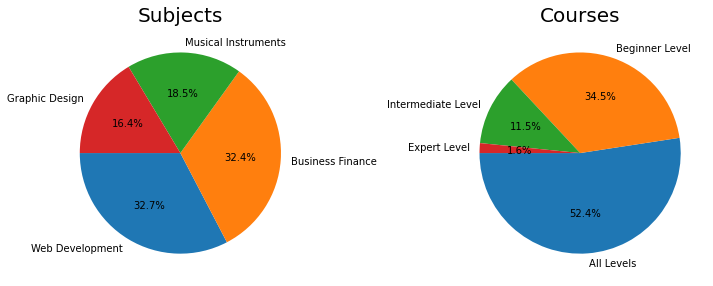

In [430]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].pie(subject_counts, startangle=180, labels=subject_counts.index, autopct="%1.1f%%")
ax[0].set_title("Subjects", size=20)
ax[1].pie(course_count, startangle=180, labels=course_count.index, autopct="%1.1f%%")
ax[1].set_title("Courses Levels", size=20)
plt.tight_layout()
plt.show()


### More visualization of data
#### draw histogram for all the numerical variables

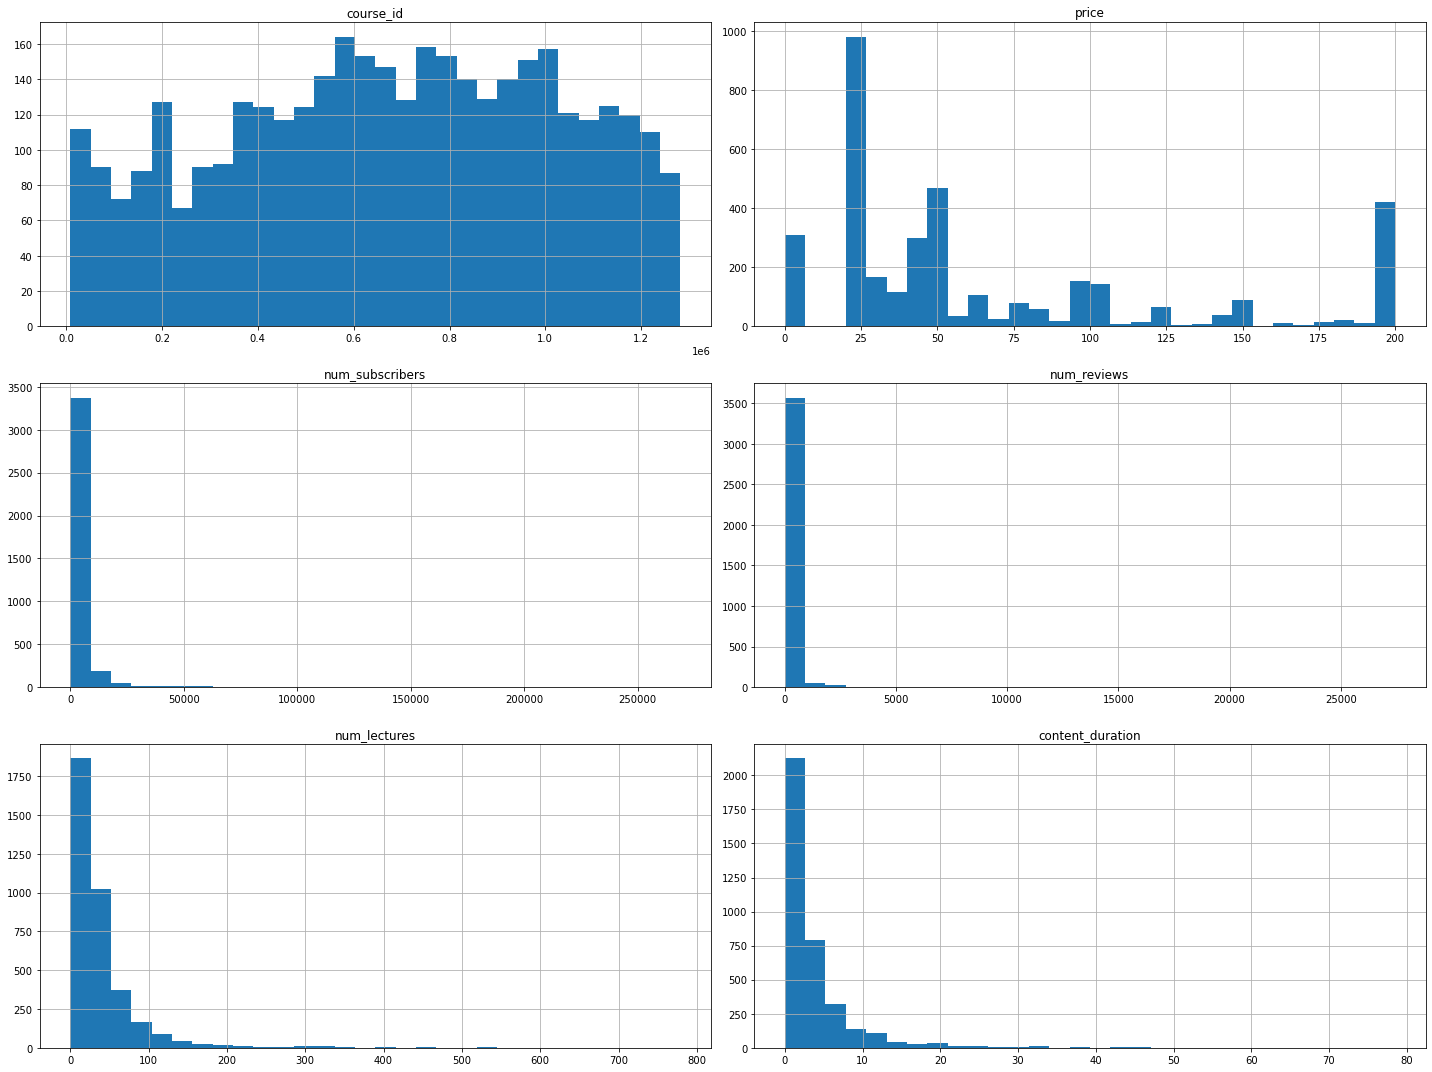

In [391]:
udemycourses.drop("is_paid", axis=1).hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()


### Exploring relationships


In [393]:
corr_matrix = udemycourses.corr()
corr_matrix

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013765,0.143062,-0.166094,-0.058310,-0.024735,-0.057236
is_paid,-0.013765,1.000000,0.328910,-0.267056,-0.087445,0.112788,0.094594
price,0.143062,0.328910,1.000000,0.050436,0.113568,0.329944,0.293200
num_subscribers,-0.166094,-0.267056,0.050436,1.000000,0.651070,0.158351,0.162118
num_reviews,-0.058310,-0.087445,0.113568,0.651070,1.000000,0.243019,0.228852
num_lectures,-0.024735,0.112788,0.329944,0.158351,0.243019,1.000000,0.801624
content_duration,-0.057236,0.094594,0.293200,0.162118,0.228852,0.801624,1.000000


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


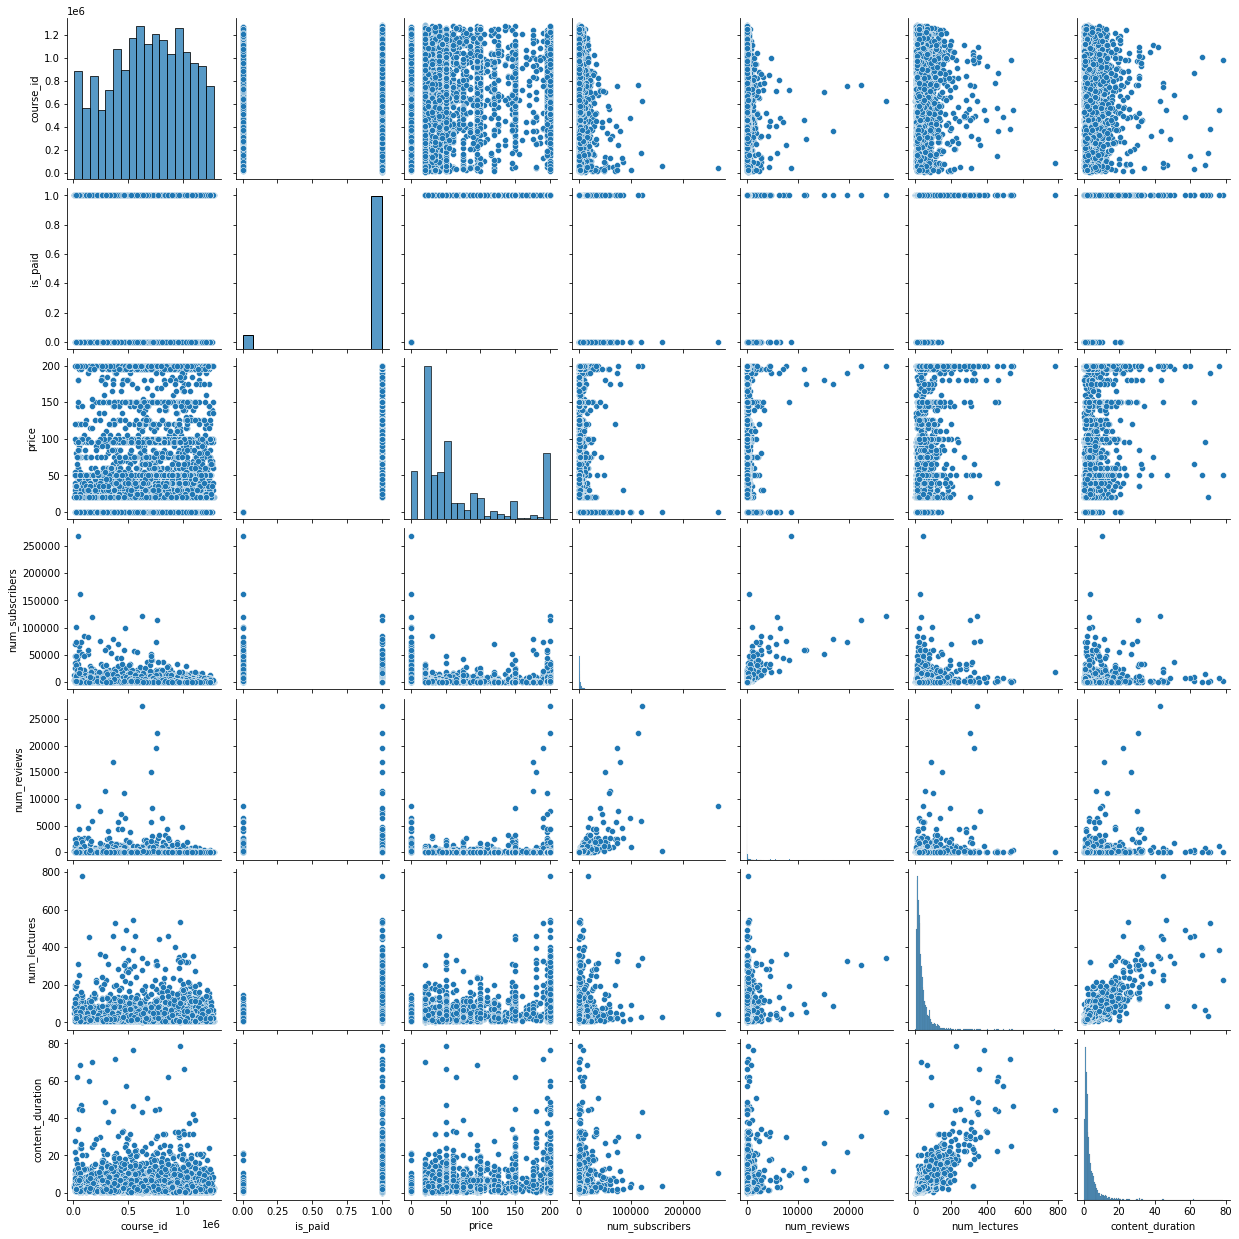

In [374]:
sns.pairplot(udemycourses)

#### Determining relationship between number subscribers and number of reviews 

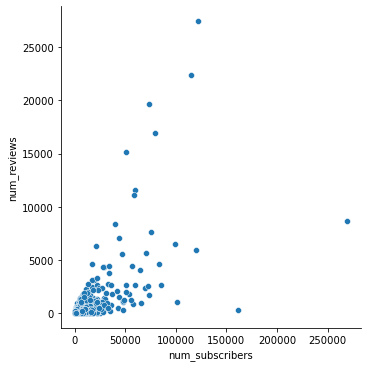

In [397]:
sns.relplot(x = 'num_subscribers', y = 'num_reviews', data = udemycourses, kind = 'scatter')

#### Relationship between content duration and number of subscribers

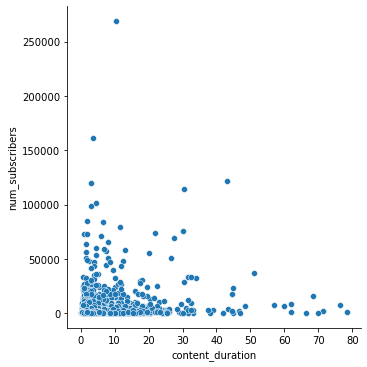

In [226]:
sns.relplot(x = 'content_duration', y = 'num_subscribers', data = udemycourses, kind = 'scatter')

#### Relationship between number of Lectures and number of subscribers

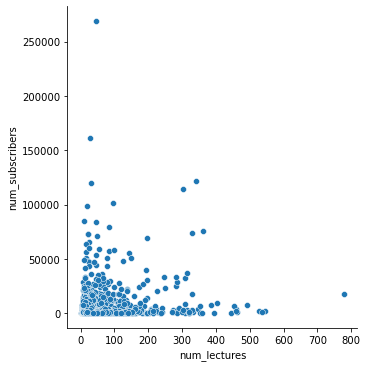

In [228]:
sns.relplot(x='num_lectures', y='num_subscribers', data = udemycourses, kind = 'scatter' )

#### Relationship between price and number of subcribers

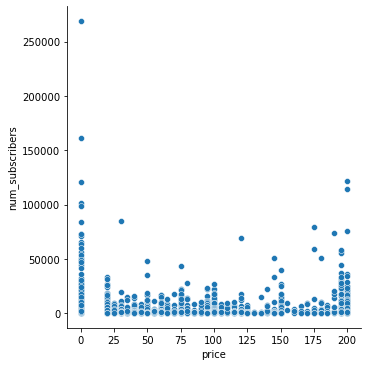

In [231]:
sns.relplot(x = 'price', y = 'num_subscribers', data = udemycourses, kind = 'scatter', )

#### relationship between content duration and price

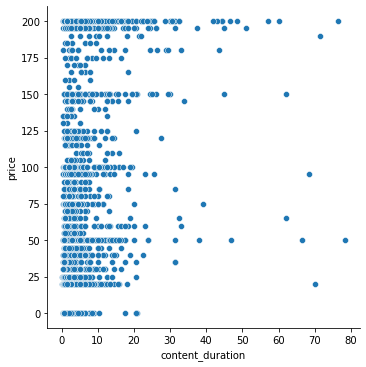

In [233]:
sns.relplot(x='content_duration', y = 'price', data = udemycourses, kind = 'scatter')

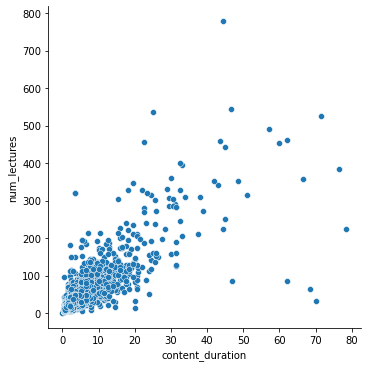

In [375]:
sns.relplot(x='content_duration', y = 'num_lectures', data = udemycourses, kind = 'scatter')

### Creating categorical plots to differentiate categorical variables
#### Note that due to the cluster of text on the x-axis the orientation fo the count plots are switched to the y-axos

#### Frequency of udemy courses at all levels

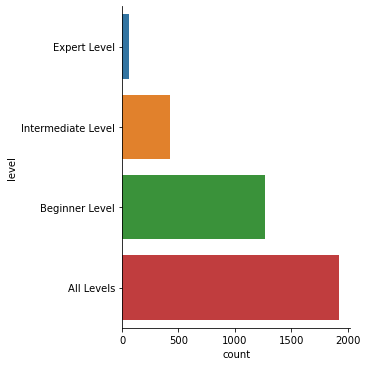

In [288]:
sns.catplot(y = 'level', data = udemycourses, kind = 'count', order = ['Expert Level', 'Intermediate Level', 'Beginner Level', 'All Levels'])

#### frequency of level by subject 


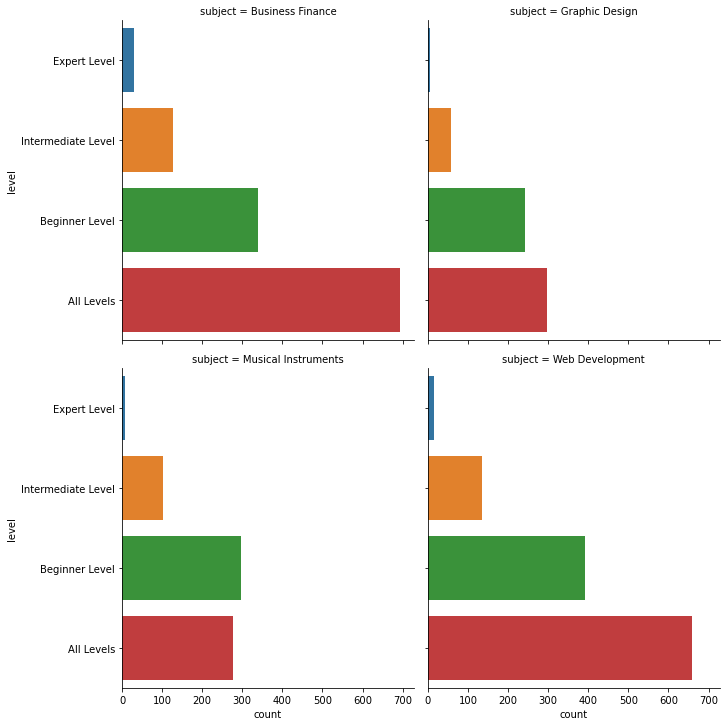

In [347]:
sns.catplot(y = 'level', kind = 'count', data = udemy_courses_new, col_wrap = 2, col = 'subject', order = ['Expert Level', 'Intermediate Level', 'Beginner Level', 'All Levels'])

#### Alternative: frequency of level by subject

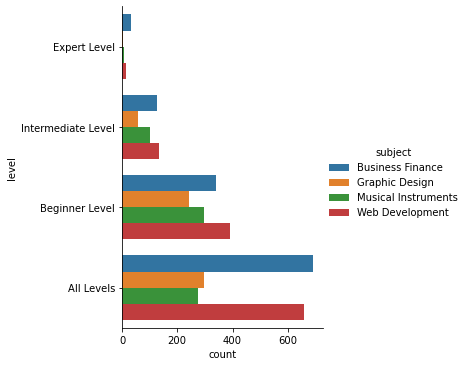

In [289]:
sns.catplot(y = 'level', data = udemycourses, kind = 'count', hue = 'subject', order = ['Expert Level', 'Intermediate Level', 'Beginner Level', 'All Levels'])

#### Frequency of subjects 

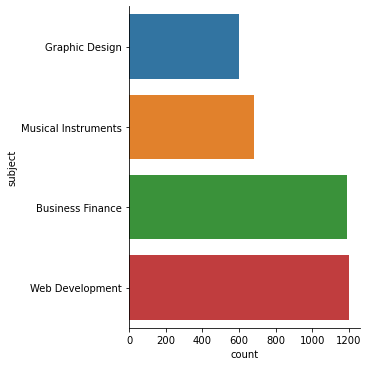

In [298]:
sns.catplot(y='subject', data = udemycourses, kind = 'count', order = ['Graphic Design', 'Musical Instruments', 'Business Finance', 'Web Development'])

#### Frequency of subject by level

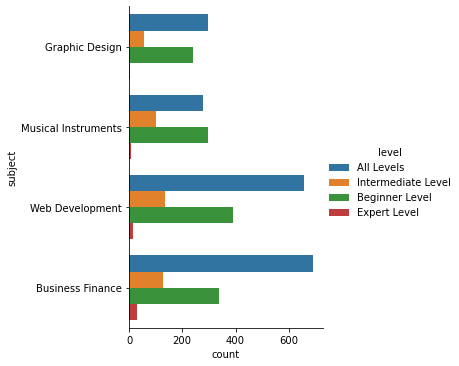

In [297]:
sns.catplot(y='subject', data = udemycourses, hue = 'level', kind = 'count', order = ['Graphic Design', 'Musical Instruments', 'Web Development', 'Business Finance'])

#### Frequency of paid and non_paid subjectes

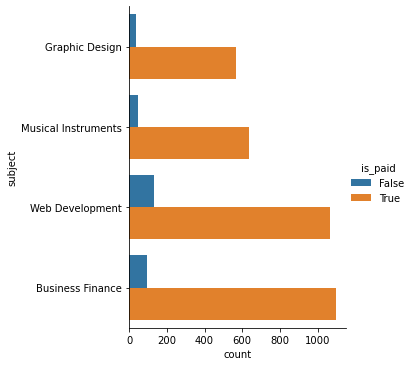

In [352]:
sns.catplot(y='subject', data = udemycourses, hue = 'is_paid', kind = 'count', order = ['Graphic Design', 'Musical Instruments', 'Web Development', 'Business Finance'])

### Looking for paid or unpaid courses

In [402]:
udemycourses['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

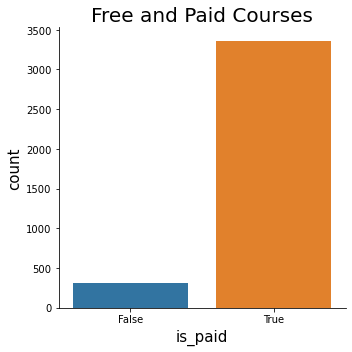

In [412]:
sns.catplot(x = 'is_paid', data = udemycourses, kind = 'count')
plt.title("Free and Paid Courses", size=20)
plt.xlabel("is_paid", size = 15)
plt.ylabel("count", size=15)
plt.tight_layout()
plt.show()

#### grouping subjects by prices

In [414]:
price_of_subjects = udemycourses["price"].value_counts().sort_index()

0      310
20     827
25     153
30     166
35     116
40     216
45      83
50     468
55      35
60      75
65      30
70      26
75      80
80      29
85      31
90      19
95     152
100    133
105     11
110      8
115     16
120     37
125     30
130      3
135      8
140     10
145     27
150     88
155      2
160      4
165      6
170      5
175     13
180     17
185      6
190     10
195    127
200    295
Name: price, dtype: int64

### Bar plot to show the mean of the quantitative variables among observations - 
##### Note that Seaborn shows 95% confidence intervals for these means
##### Also not that the orientation of the bar plots are switched due to the cluster of text on the x-axis
#### Mean of subscribers per subject

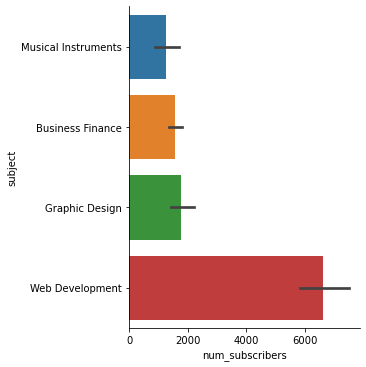

In [353]:
sns.catplot(x='num_subscribers', y ='subject', kind = 'bar', data = udemycourses, order = ['Musical Instruments', 'Business Finance', 'Graphic Design', 'Web Development'])

#### Mean of reviews per subject

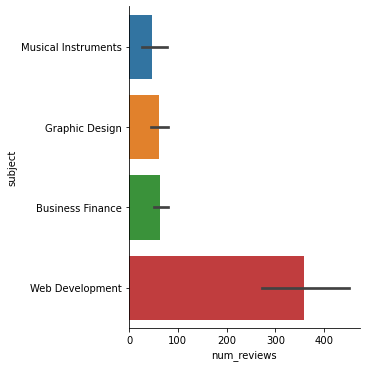

In [355]:
sns.catplot(y='subject', x = 'num_reviews', kind = 'bar',  data = udemycourses, order = ['Musical Instruments', 'Graphic Design', 'Business Finance',  'Web Development'])

#### Mean of subject by content duration

Text(-78.075, 0.5, 'Level')

<Figure size 720x360 with 0 Axes>

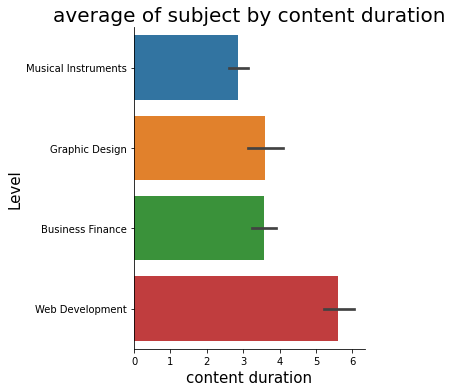

In [449]:
plt.figure(figsize=(10,5))
sns.catplot(y='subject', x = 'content_duration', kind = 'bar',  data = udemycourses, order = ['Musical Instruments', 'Graphic Design', 'Business Finance',  'Web Development'])
plt.title("average of subject by content duration", size=20)
plt.xlabel("content duration", size=15)
plt.ylabel("Level", size=15)

#### subject by content duration, and is_paid

<Figure size 720x360 with 0 Axes>

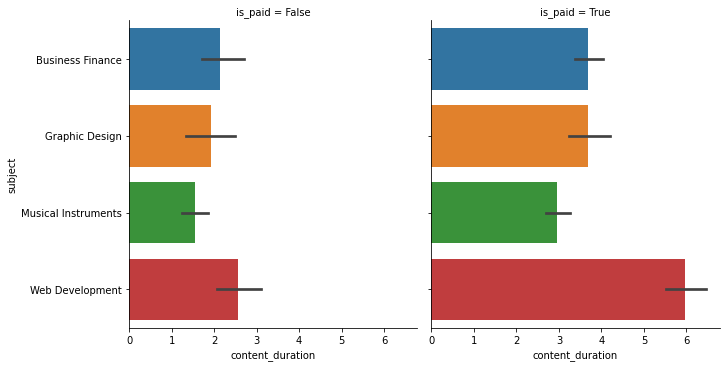

In [448]:
plt.figure(figsize=(10,5))
sns.catplot(y='subject', x = 'content_duration', kind = 'bar', col = 'is_paid', data = udemycourses)



#### average content duration by level

Text(-71.075, 0.5, 'Level')

<Figure size 720x360 with 0 Axes>

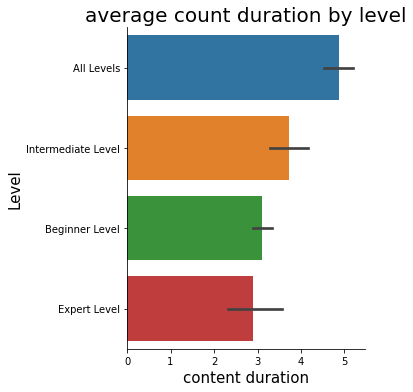

In [441]:
plt.figure(figsize=(10,5))
sns.catplot(y='level', x = 'content_duration', kind = 'bar',  data = udemycourses)
plt.title("average of course duration by level", size=20)
plt.xlabel("content duration", size=15)
plt.ylabel("Level", size=15)

<Figure size 720x360 with 0 Axes>

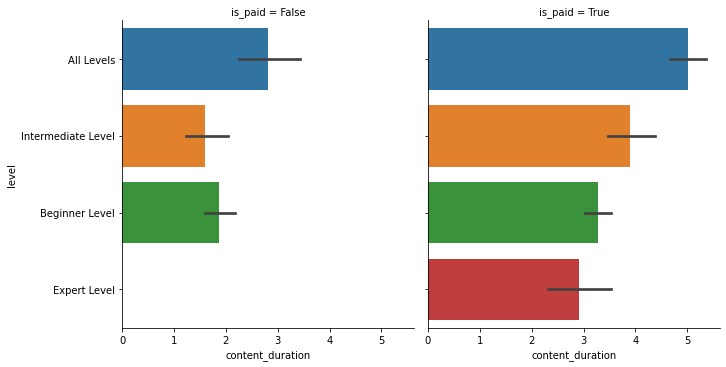

In [439]:
plt.figure(figsize=(10,5))
sns.catplot(y='level', x = 'content_duration', kind = 'bar', col = 'is_paid', data = udemycourses)


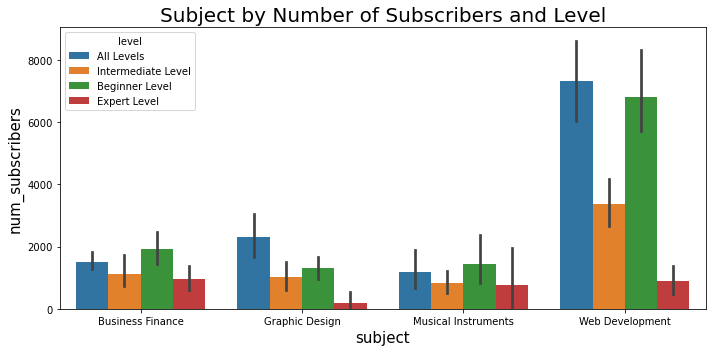

In [436]:
plt.figure(figsize=(10,5))
sns.barplot(x=udemycourses["subject"], y=udemycourses["num_subscribers"], hue=udemycourses["level"])
plt.title("Subject by Number of Subscribers and Level", size=20)
plt.xlabel("subject", size=15)
plt.ylabel("num_subscribers", size=15)
plt.tight_layout()
plt.show()

### Determining the distribution of the quatitative data using box plot
##### this is to help us see the median, spread, skewness, and outliers
##### and also facilitate coparisons between groups

### comparing the mean group of subjects by price

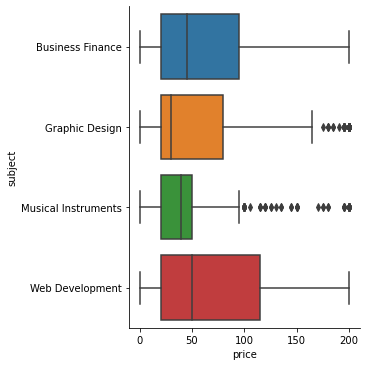

In [362]:
sns.catplot(x = 'price', y = 'subject', data  = udemycourses, kind = 'box')

#### omitting Outliers
##### we can equally use the whis parameter . e.g whis = [0, 100] to set the lower and maximum values/percentiles

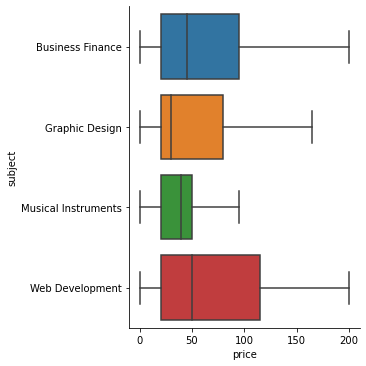

In [341]:
sns.catplot(x = 'price', y = 'subject', data  = udemycourses, kind = 'box', sym = "")

##### arranging in order we can see that the median bill is higher for web developmnt. However the spread of the distribution is also larger


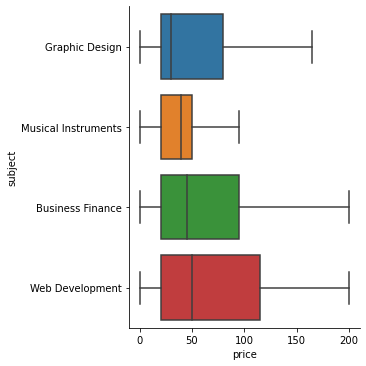

In [363]:
sns.catplot(x = 'price', y = 'subject', data  = udemycourses, kind = 'box', sym = "", order = ['Graphic Design', 'Musical Instruments', 'Business Finance', 'Web Development'])

### finding correlation matrix of quantitative variables

#### Looking for relationship within the quantitative variables

In [376]:
corr_udemycourses =udemycourses.corr() 
corr_udemycourses

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013765,0.143062,-0.166094,-0.058310,-0.024735,-0.057236
is_paid,-0.013765,1.000000,0.328910,-0.267056,-0.087445,0.112788,0.094594
price,0.143062,0.328910,1.000000,0.050436,0.113568,0.329944,0.293200
num_subscribers,-0.166094,-0.267056,0.050436,1.000000,0.651070,0.158351,0.162118
num_reviews,-0.058310,-0.087445,0.113568,0.651070,1.000000,0.243019,0.228852
num_lectures,-0.024735,0.112788,0.329944,0.158351,0.243019,1.000000,0.801624
content_duration,-0.057236,0.094594,0.293200,0.162118,0.228852,0.801624,1.000000


#### selecting only the quantitative variables for the correlation

In [377]:
quant_variables = udemycourses[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']]
quant_variables

,price,num_subscribers,num_reviews,num_lectures,content_duration
0,200,2147,23,51,1.5
1,75,2792,923,274,39.0
2,45,2174,74,51,2.5
3,95,2451,11,36,3.0
4,200,1276,45,26,2.0
...,...,...,...,...,...
3673,100,1040,14,21,2.0
3674,25,306,3,42,3.5
3675,40,513,169,48,3.5
3676,50,300,31,38,3.0


In [378]:
quant_variables.corr()

,price,num_subscribers,num_reviews,num_lectures,content_duration
price,1.000000,0.050436,0.113568,0.329944,0.293200
num_subscribers,0.050436,1.000000,0.651070,0.158351,0.162118
num_reviews,0.113568,0.651070,1.000000,0.243019,0.228852
num_lectures,0.329944,0.158351,0.243019,1.000000,0.801624
content_duration,0.293200,0.162118,0.228852,0.801624,1.000000


#### generating heatmap for the correlation

<AxesSubplot:>

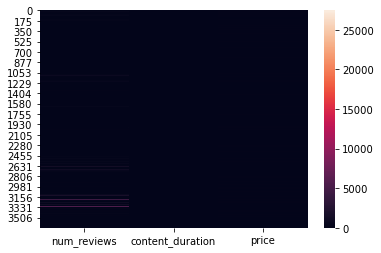

In [388]:
sns.heatmap(udemycourses[['num_reviews', 'content_duration', 'price']])